# Train a multitask model using ECFP features
When using scaffold or fingerprint splits, ECFP features tend to do poorly compared to descriptors, but it is still worth taking a look.

In [15]:
import atomsci.ddm.pipeline.model_pipeline as mp
import atomsci.ddm.pipeline.parameter_parser as parse
import atomsci.ddm.utils.split_response_dist_plots as srdp
import atomsci.ddm.utils.split_diagnostic_plots as sdp
import pandas as pd
import atomsci.ddm.utils.compare_splits_plots as csp
import matplotlib.pyplot as plt
import seaborn as sns
import atomsci.ddm.pipeline.perf_plots as pp

# Set for less chatty log messages
import logging
logger = logging.getLogger('ATOM')
logger.setLevel(logging.INFO)

In [28]:
splitter = 'multitaskscaffold'
dset_file = '../dataset/SLC6A2_3_4.csv'
mtss_split_uuid = '0e7aabc4-ad37-4dca-8e43-0103a30850e7'

params = {
    "dataset_key" : dset_file,
    "splitter": splitter,
    "split_valid_frac": "0.20",
    "split_test_frac": "0.20",
    "split_strategy": "train_valid_test",
    "mtss_train_valid_dist_weight": "1.0",
    "mtss_train_test_dist_weight": "1.0",
    "mtss_split_fraction_weight": "1.0",
    "mtss_response_distr_weight": "3.0",
    "mtss_num_generations": "25",
    "mtss_num_super_scaffolds": "100",
    "previously_split": "True",
    "previously_featurized": "True",
    "split_uuid": mtss_split_uuid,
    "prediction_type": "regression",
    "response_cols" : "avg_pKi_SLC6A2,avg_pKi_SLC6A3,avg_pKi_SLC6A4",
    "id_col": "compound_id",
    "smiles_col" : "base_rdkit_smiles",
    "result_dir": 'dataset/SLC6A2_3_4_models',
    "model_type": "NN",
    "featurizer": "ecfp",
    "descriptor_type": "ecfp",
    "learning_rate": ".0005",
    "layer_sizes": "128,64",
    "dropouts": "0.3,0.3",
    "max_epochs": "500",
    "early_stopping_patience": "50",
    "verbose": "True",
}
pparams = parse.wrapper(params)
mtss_ecfp_MP = mp.ModelPipeline(pparams)
mtss_ecfp_MP.train_model()

INFO:ATOM:Featurized dataset not previously saved for dataset SLC6A2_3_4, creating new
INFO:ATOM:Featurizing sample 0
INFO:ATOM:Featurizing sample 1000
INFO:ATOM:Featurizing sample 2000
INFO:ATOM:Featurizing sample 3000
INFO:ATOM:Wrote transformers to dataset/SLC6A2_3_4_models/SLC6A2_3_4/NN_ecfp_multitaskscaffold_regression/f7477edd-4ca4-4011-9705-1ad645dd74ee/transformers.pkl
INFO:ATOM:Transforming response data
INFO:ATOM:Transforming response data
INFO:ATOM:Transforming response data
INFO:ATOM:Total score for epoch 0 is 0.00126
INFO:ATOM:Epoch 0: training mean-r2_score = 0.006, validation mean-r2_score = 0.001, test mean-r2_score = -0.001
INFO:ATOM:*** Total score for epoch 1 is 0.0142, is new maximum
INFO:ATOM:Epoch 1: training mean-r2_score = 0.023, validation mean-r2_score = 0.014, test mean-r2_score = 0.006
INFO:ATOM:*** Total score for epoch 2 is 0.0314, is new maximum
INFO:ATOM:Epoch 2: training mean-r2_score = 0.053, validation mean-r2_score = 0.031, test mean-r2_score = 0.015

['dataset/SLC6A2_3_4_models/SLC6A2_3_4/NN_ecfp_multitaskscaffold_regression/f7477edd-4ca4-4011-9705-1ad645dd74ee/model/checkpoint1.pt', 'dataset/SLC6A2_3_4_models/SLC6A2_3_4/NN_ecfp_multitaskscaffold_regression/f7477edd-4ca4-4011-9705-1ad645dd74ee/model/checkpoint2.pt', 'dataset/SLC6A2_3_4_models/SLC6A2_3_4/NN_ecfp_multitaskscaffold_regression/f7477edd-4ca4-4011-9705-1ad645dd74ee/model/checkpoint3.pt', 'dataset/SLC6A2_3_4_models/SLC6A2_3_4/NN_ecfp_multitaskscaffold_regression/f7477edd-4ca4-4011-9705-1ad645dd74ee/model/checkpoint4.pt', 'dataset/SLC6A2_3_4_models/SLC6A2_3_4/NN_ecfp_multitaskscaffold_regression/f7477edd-4ca4-4011-9705-1ad645dd74ee/model/checkpoint5.pt']
dataset/SLC6A2_3_4_models/SLC6A2_3_4/NN_ecfp_multitaskscaffold_regression/f7477edd-4ca4-4011-9705-1ad645dd74ee/model/checkpoint1.pt


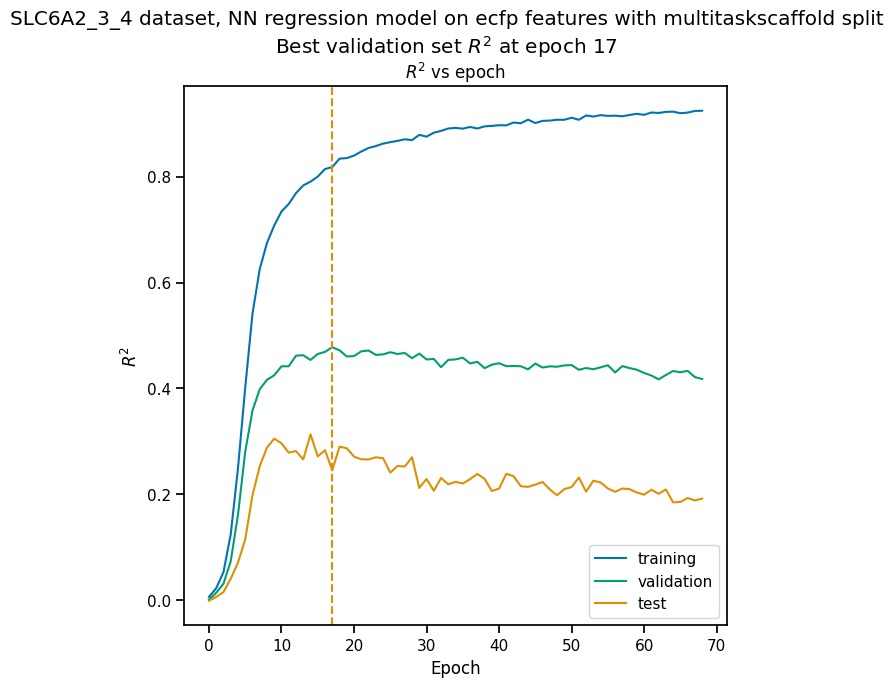

In [29]:
pp.plot_perf_vs_epoch(mtss_ecfp_MP)

You can monitor overall model training the same way you do for a single-task model. However, it is important to look at task-level performance to select your best model to predict each task.

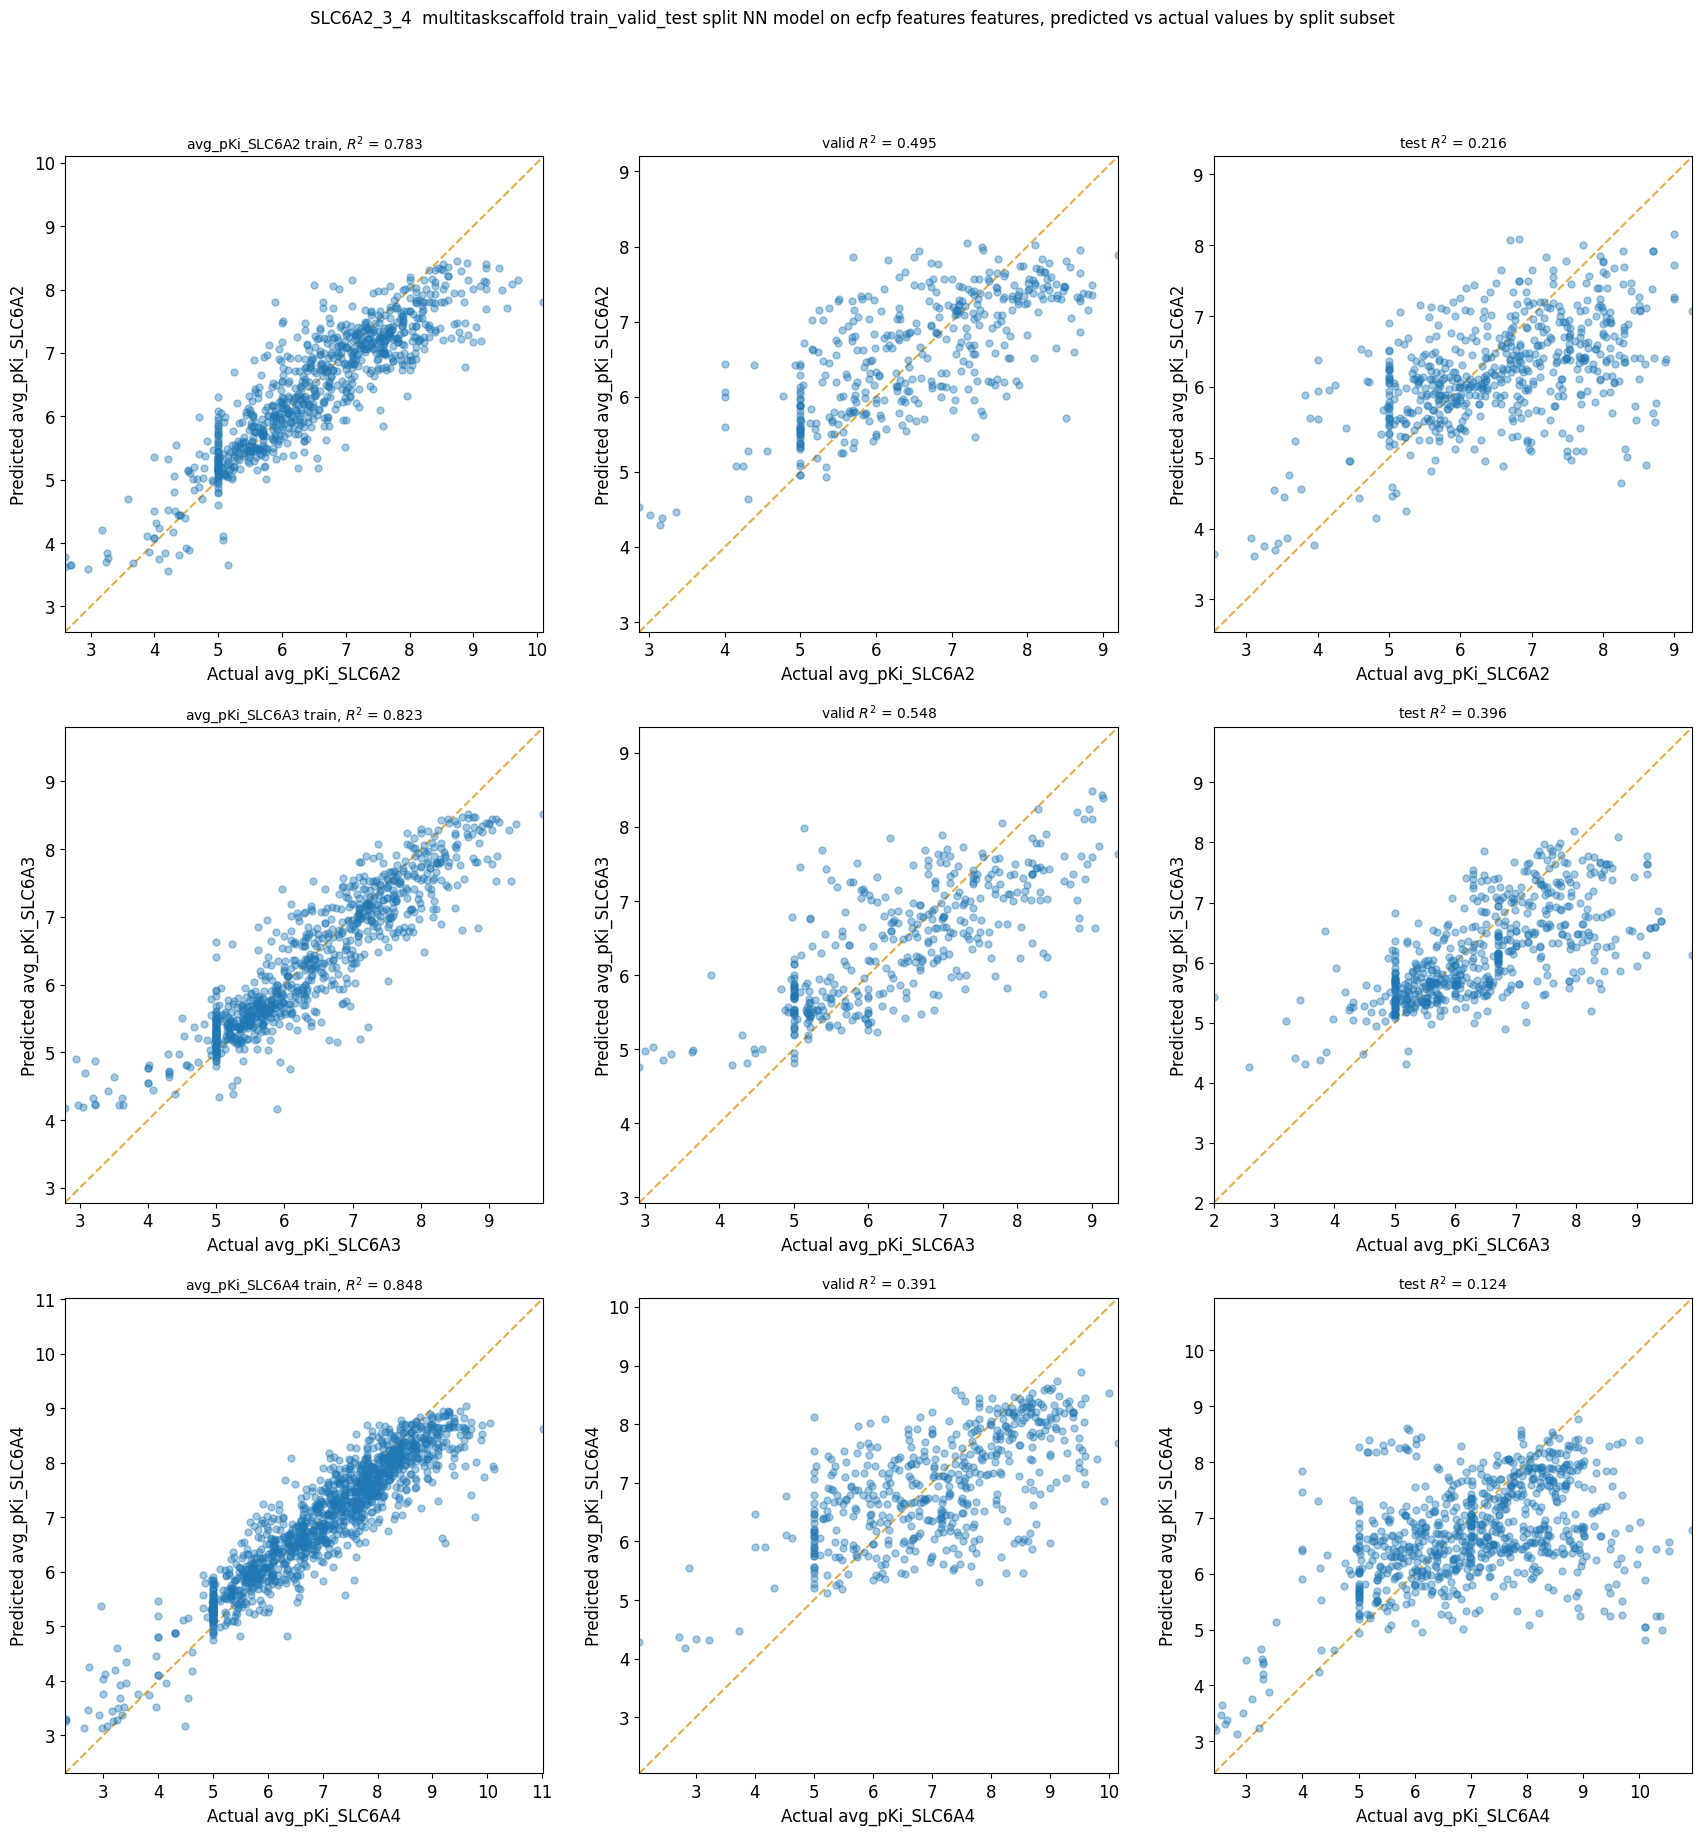

In [30]:
pp.plot_pred_vs_actual(mtss_ecfp_MP)

# Train a multitask model with RDKit features

In [33]:
params = {
    "dataset_key" : dset_file,
    "splitter": splitter,
    "split_valid_frac": "0.20",
    "split_test_frac": "0.20",
    "split_strategy": "train_valid_test",
    "mtss_train_valid_dist_weight": "1.0",
    "mtss_train_test_dist_weight": "1.0",
    "mtss_split_fraction_weight": "1.0",
    "mtss_response_distr_weight": "3.0",
    "mtss_num_generations": "25",
    "mtss_num_super_scaffolds": "100",
    "previously_split": "True",
    "previously_featurized": "True",
    "split_uuid": mtss_split_uuid,
    "prediction_type": "regression",
    "response_cols" : "avg_pKi_SLC6A2,avg_pKi_SLC6A3,avg_pKi_SLC6A4",
    "id_col": "compound_id",
    "smiles_col" : "base_rdkit_smiles",
    "result_dir": 'dataset/SLC6A2_3_4_models',
    "model_type": "NN",
    "featurizer": "computed_descriptors",
    "descriptor_type": "rdkit_raw",
    "learning_rate": ".0005",
    "layer_sizes": "128,64",
    "dropouts": "0.3,0.3",
    "max_epochs": "500",
    "early_stopping_patience": "50",
    "verbose": "True",
    "uncertainty":"True",
}
pparams = parse.wrapper(params)
mtss_rdkit_MP = mp.ModelPipeline(pparams)
mtss_rdkit_MP.train_model()

INFO:ATOM:Using prefeaturized data; number of features = 200
INFO:ATOM:Wrote transformers to dataset/SLC6A2_3_4_models/SLC6A2_3_4/NN_computed_descriptors_multitaskscaffold_regression/db9dcc26-7db3-47fc-a595-18d874d91824/transformers.pkl
INFO:ATOM:Transforming response data
INFO:ATOM:Transforming feature data
/Users/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)
INFO:ATOM:Transforming response data
INFO:ATOM:Transforming feature data
INFO:ATOM:Transforming response data
INFO:ATOM:Transforming feature data
INFO:ATOM:Total score for epoch 0 is 0.0181
INFO:ATOM:Epoch 0: training mean-r2_score = 0.031, validation mean-r2_score = 0.018, test mean-r2_score = 0.010
INFO:ATOM:*** Total score for epoch 1 is 0.0441, is new maximum
INFO:ATOM:Epoch 1: training mean-r2_score = 0.079, validation mean-r2_score = 0.044, test mean-r2_score = 0.024
INFO:ATOM

['dataset/SLC6A2_3_4_models/SLC6A2_3_4/NN_computed_descriptors_multitaskscaffold_regression/db9dcc26-7db3-47fc-a595-18d874d91824/model/checkpoint1.pt', 'dataset/SLC6A2_3_4_models/SLC6A2_3_4/NN_computed_descriptors_multitaskscaffold_regression/db9dcc26-7db3-47fc-a595-18d874d91824/model/checkpoint2.pt', 'dataset/SLC6A2_3_4_models/SLC6A2_3_4/NN_computed_descriptors_multitaskscaffold_regression/db9dcc26-7db3-47fc-a595-18d874d91824/model/checkpoint3.pt', 'dataset/SLC6A2_3_4_models/SLC6A2_3_4/NN_computed_descriptors_multitaskscaffold_regression/db9dcc26-7db3-47fc-a595-18d874d91824/model/checkpoint4.pt', 'dataset/SLC6A2_3_4_models/SLC6A2_3_4/NN_computed_descriptors_multitaskscaffold_regression/db9dcc26-7db3-47fc-a595-18d874d91824/model/checkpoint5.pt']
dataset/SLC6A2_3_4_models/SLC6A2_3_4/NN_computed_descriptors_multitaskscaffold_regression/db9dcc26-7db3-47fc-a595-18d874d91824/model/checkpoint1.pt


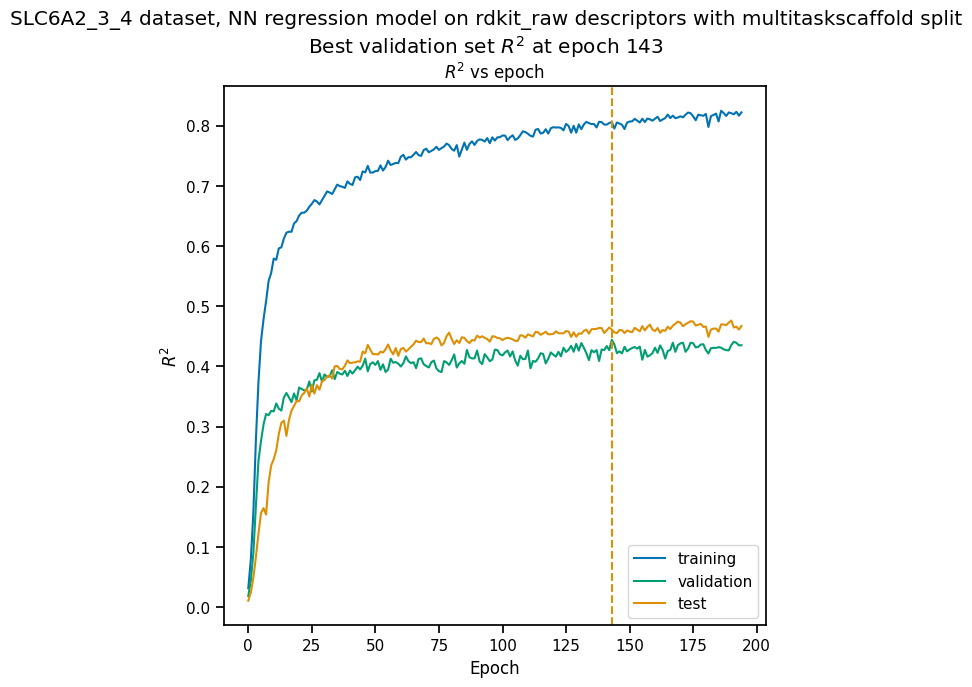

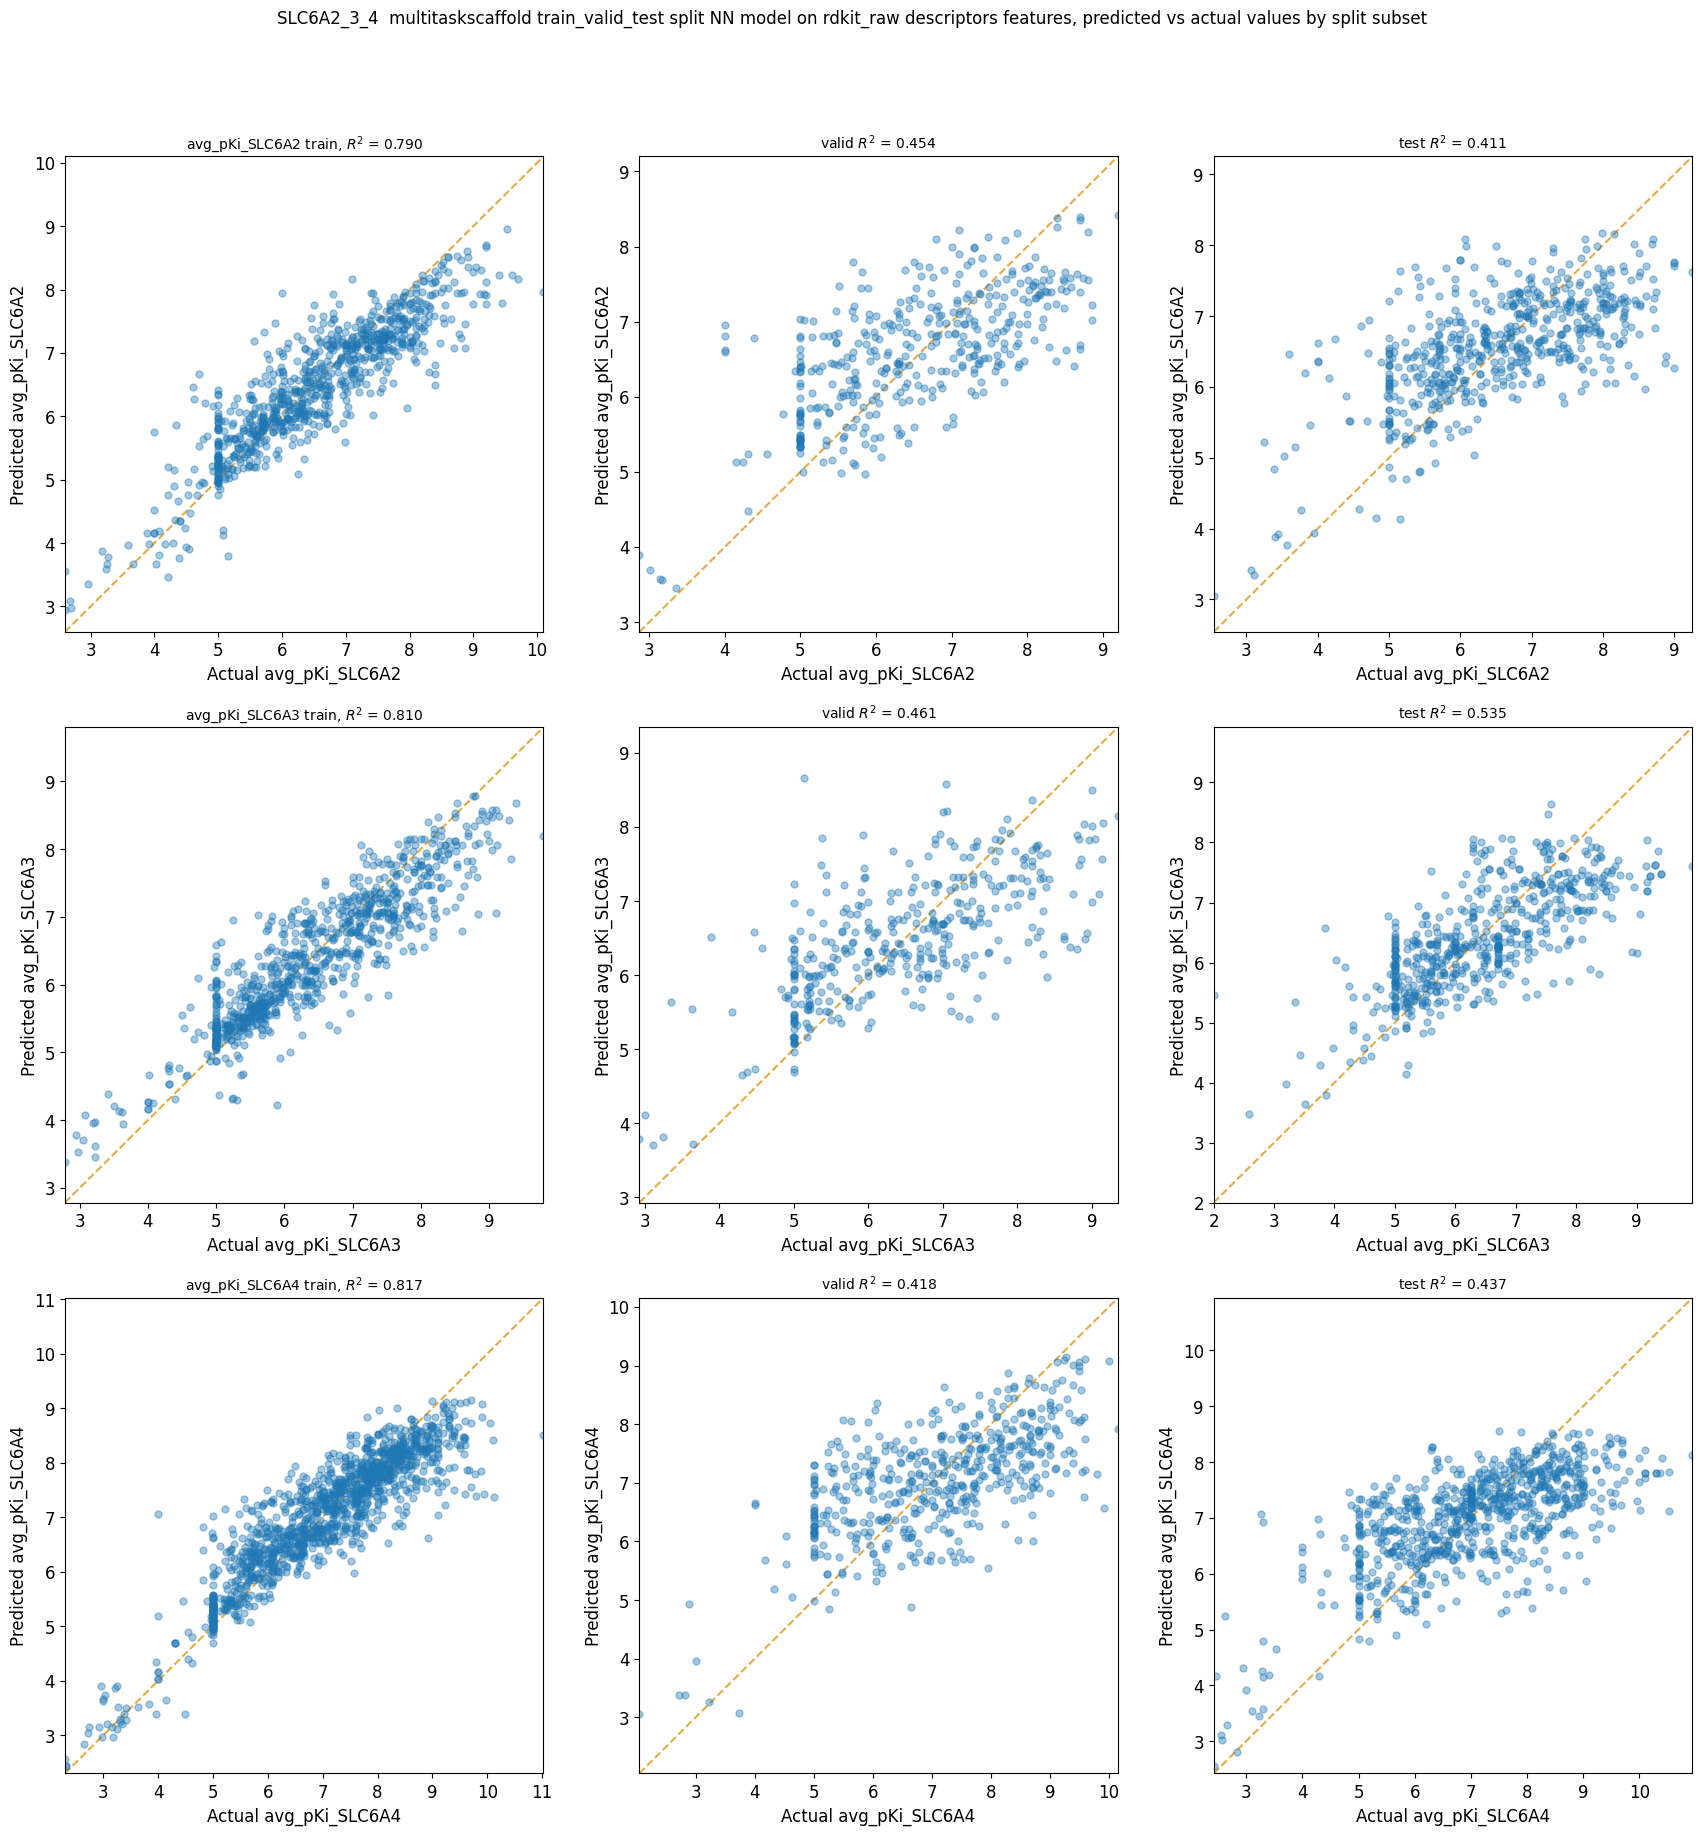

In [34]:
pp.plot_perf_vs_epoch(mtss_rdkit_MP)
pp.plot_pred_vs_actual(mtss_rdkit_MP, error_bars=True)